<a href="https://colab.research.google.com/github/NaHyeon1Kim/Modeling/blob/main/KNN_Naive_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. K-Nearest Neighbors

- 장점
  - 쉬운 알고리즘
  - 튜닝할 hyperparameter 스트레스가 없음
- 단점
  - Observation 증가에 따른 계산 비용
  - pre-processing을 잘하지 않으면 좋은 성능을 기대하기 어려움-> 거리!
  - feature의 값이 대부분 0인 데이터셋, Sparse인 경우 성능 이슈

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print('accuracy : {:.2f}'.format(knn.score(X_test,y_test)))
print('accuracy : {:2f}'.format(knn2.score(X_test,y_test)))

accuracy : 1.00
accuracy : 1.000000


**2. Naive Bayes**

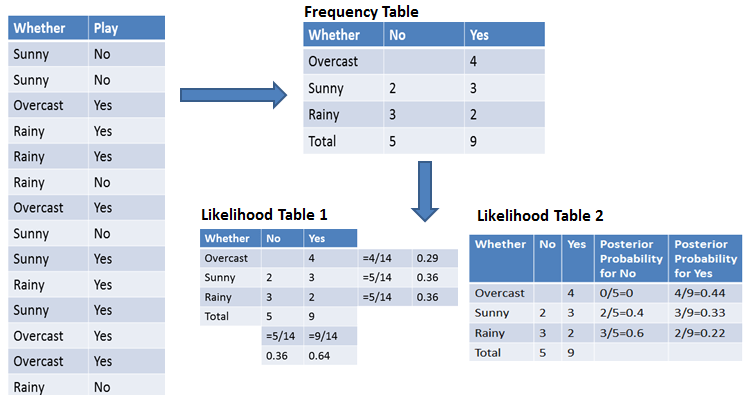

- Bayes 정리를 활용한 분류
- Frequency Table: 데이터에서의 빈도
- Likelihood Table 1: 각 Feature X 각 Label에 대한 확률
- Likelihood Table 2는 각 Feature에 대한 사후 확률

- 예: 날씨가 Overcast(흐린)
 - P(Yes|overcast) = P(overcast|Yes) * P(Yes)/P(overcast)
 1. 사전확률(Prior Probability)

    P(overcast) = 4/14 = 0.29

    P(Yes) = 9/14 = 0.64

 2. 사후 확률(posterior probability)

    P(Overcast|NO) = 0/9 = 0

 3. 베이즈 정리에 대입

    P(NO|overcast) = P(overcast|NO) * (P(No) / P(overcast)) = 0*(0.36 / 0.29) = 0

 - P(Yes|Overcast) = 1, P(No|Overcast) = 0
 - 날씨가 Overcast일 때 축구를 하는 확률은 0, 축구를 하지 않을 확률은 1
 - 두 확률을 비교한 뒤 더 높은 확률의 Label로 분류



- Feature가 2개 이상인 경우

<figure>
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FYGLmm%2FbtqwIYLAj80%2FN2C1tFlYC9zNzvUKjy9tgk%2Fimg.png'>


 1. 사전 확률

    P(Yes) = 9/14 = 0.64

 2. 사후 확률

    P(Overcast|Yes) = 4/9 = 0.44

    P(Mild|Yes) = 4/9 = 0.44

 3. 베이즈 공식에 대입

    P(Weather=Overcast, Temp=Mild | Play=Yes) = P(Overcast|Yes) P(Mild|Yes) = 0.44 * 0.44 = 0.1936

    P(Paly=Yes | Weather=Overcast, Temp=Mild) = P(Weather=Overcast, Temp=Mild | Play=Yes) P(Play=Yes) / P(Weather=Overcast, Temp=Mild)= 0.1936 * 0.64 / 0.1224 = 1

- 장점

1. 간단하고, 빠르며, 정확한 모델

2. computation cost가 작음

3. 큰 데이터셋에 적합

4. 연속형보다 이산형 데이터에서 성능이 좋음, DTM?

5. Multiple class 예측을 위해서도 사용할 수 있음

- 단점: feature 간의 독립성을 가정
 - **features are conditionally independent**
 - 실제 데이터에서 모든 feature가 독립인 경우는 없기에 "Naive한 가정"


- NB의 종류
 1. GaussianNB → Feature가 연속형
 2. CategoricalNB → Feature가 범주형
 3. MultinomialNB → DTM에 활용

In [ ]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [ ]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.|
weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [ ]:
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(play)
print("Temp:", temp_encoded)
print("Play:", label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print("Temp:",temp_encoded)
print("Play:",label)

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [ ]:
import pandas as pd
features = pd.DataFrame({"temp":temp_encoded, "weather":weather_encoded})
print(features)

    temp  weather
0      1        2
1      1        2
2      1        0
3      2        1
4      0        1
5      0        1
6      0        0
7      2        2
8      0        2
9      2        1
10     2        2
11     2        0
12     1        0
13     2        1


In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


- NB 연습(target의 범주가 3 이상)

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
wine = datasets.load_wine()

# print the names of the 13 features
print("Features: ", wine.feature_names)

# print the label type of wine(class_0, class_1, class_2)
print("Labels: ", wine.target_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074074074074074


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=0)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

#3. SVM

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [5]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [6]:
print('accuracy : {:.2f}'.format(svm.score(X_test,y_test)))

accuracy : 1.00


In [7]:
y_predict = svm.predict(X_test)

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### gridsearch

In [9]:
from sklearn.model_selection import GridSearchCV

models = GridSearchCV(estimator=SVC(), param_grid={"C":[0.5,1, 2], "gamma":[0.01, 0.1, 1.0]}, scoring="accuracy", cv=3)
models.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.5, 1, 2], 'gamma': [0.01, 0.1, 1.0]},
             scoring='accuracy')

In [14]:
print(models.best_estimator_)
print(models.best_params_)
print(models.best_score_)

SVC(C=0.5, gamma=0.1)
{'C': 0.5, 'gamma': 0.1}
0.9666666666666667
